In [148]:
import pandas as pd
import numpy as np
import pandas as pd

sns.set_theme(style="whitegrid")

In [3]:

class Mapping():

    def __init__(self,exel_filename:str,sheet_name:str):
        self.exel_filename = exel_filename
        self.sheet_name = sheet_name
        self.df = None
        self._parameter_defaults:dict = {}
        self._param_mapping:dict = {}
        self._model_list:list = []

        self._read_file()
        self._get_default_mapping()
        self._get_parameter_mapping()
        self._get_model_list()

    @property
    def parameter_defaults(self):
        return self._parameter_defaults

    @property
    def param_mapping(self):
        return self._param_mapping

    @property
    def model_list(self):
        return self._model_list

    def _read_file(self):
        self.df = pd.read_excel(self.exel_filename,sheet_name = self.sheet_name,skiprows=[1])

    def get_sheet(self):
        return self.df

    def _get_default_mapping(self)->None:

        if self.df.empty:
            raise Exception("no dataframe - call read_file")

        df = self.df.set_index('Model').copy()
        df = df.T

        for col in df:
            for param in df[col].unique():
                if param != param: # ignore nan
                    continue
                self._parameter_defaults[col] =  np.nan


    def _get_parameter_mapping(self)->None:

        if self.df.empty:
            raise Exception("no dataframe - call read_file")

        df = self.df.set_index('Model').copy()
        df = df.T

        for col in df:
            for param in df[col].unique():
                if param != param: # ignore nan
                    continue
                param = param.replace('%','[0-9]+')
                self._param_mapping[param] =  col


    def _get_model_list(self)->list:
        if self.df.empty:
         raise Exception("no dataframe - call read_file")

        self._model_list =  self.df.columns.to_list()[1:]

mapping = Mapping('model_data.xlsx','LTE')



mapping.model_list
mapping.parameter_defaults
mapping.get_sheet()

,Model,AOG_H87_KOFH,AOG_K74,AOG_K78_e83.4,Blfdrm_I98,EW8799,HVR-879T_e7,HVR-879TH,HVR-879TG,HVR-879T,...,Y684h-063_OGV_LOW,Y687-060_e7,Y687-060_HT,Y687-060,Y689Zh-061_e7,Y689Zh-061_OGV_SKD,Y689Zh-061_Yra,Y7631-42_e6,Y7631-42_e7,Y7631-42
0,Serial,InternetGatewayDevice.DeviceInfo.SerialNumber,InternetGatewayDevice.DeviceInfo.SerialNumber,InternetGatewayDevice.DeviceInfo.SerialNumber,InternetGatewayDevice.DeviceInfo.SerialNumber,InternetGatewayDevice.DeviceInfo.SerialNumber,InternetGatewayDevice.DeviceInfo.SerialNumber,InternetGatewayDevice.DeviceInfo.SerialNumber,InternetGatewayDevice.DeviceInfo.SerialNumber,InternetGatewayDevice.DeviceInfo.SerialNumber,...,InternetGatewayDevice.DeviceInfo.SerialNumber,InternetGatewayDevice.DeviceInfo.SerialNumber,InternetGatewayDevice.DeviceInfo.SerialNumber,InternetGatewayDevice.DeviceInfo.SerialNumber,InternetGatewayDevice.DeviceInfo.SerialNumber,InternetGatewayDevice.DeviceInfo.SerialNumber,InternetGatewayDevice.DeviceInfo.SerialNumber,InternetGatewayDevice.DeviceInfo.SerialNumber,InternetGatewayDevice.DeviceInfo.SerialNumber,InternetGatewayDevice.DeviceInfo.SerialNumber
1,Timestamp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MODEL,InternetGatewayDevice.DeviceInfo.ModelName,InternetGatewayDevice.DeviceInfo.ModelName,InternetGatewayDevice.DeviceInfo.ModelName,InternetGatewayDevice.DeviceInfo.ModelName,InternetGatewayDevice.DeviceInfo.ModelName,InternetGatewayDevice.DeviceInfo.ModelName,InternetGatewayDevice.DeviceInfo.ModelName,InternetGatewayDevice.DeviceInfo.ModelName,InternetGatewayDevice.DeviceInfo.ModelName,...,InternetGatewayDevice.DeviceInfo.ModelName,InternetGatewayDevice.DeviceInfo.ModelName,InternetGatewayDevice.DeviceInfo.ModelName,InternetGatewayDevice.DeviceInfo.ModelName,InternetGatewayDevice.DeviceInfo.ModelName,InternetGatewayDevice.DeviceInfo.ModelName,InternetGatewayDevice.DeviceInfo.ModelName,InternetGatewayDevice.DeviceInfo.ModelName,InternetGatewayDevice.DeviceInfo.ModelName,InternetGatewayDevice.DeviceInfo.ModelName
3,PRODUCT_CLASS,InternetGatewayDevice.DeviceInfo.ProductClass,InternetGatewayDevice.DeviceInfo.ProductClass,InternetGatewayDevice.DeviceInfo.ProductClass,InternetGatewayDevice.DeviceInfo.ProductClass,InternetGatewayDevice.DeviceInfo.ProductClass,InternetGatewayDevice.DeviceInfo.ProductClass,InternetGatewayDevice.DeviceInfo.ProductClass,InternetGatewayDevice.DeviceInfo.ProductClass,InternetGatewayDevice.DeviceInfo.ProductClass,...,InternetGatewayDevice.DeviceInfo.ProductClass,InternetGatewayDevice.DeviceInfo.ProductClass,InternetGatewayDevice.DeviceInfo.ProductClass,InternetGatewayDevice.DeviceInfo.ProductClass,InternetGatewayDevice.DeviceInfo.ProductClass,InternetGatewayDevice.DeviceInfo.ProductClass,InternetGatewayDevice.DeviceInfo.ProductClass,InternetGatewayDevice.DeviceInfo.ProductClass,InternetGatewayDevice.DeviceInfo.ProductClass,InternetGatewayDevice.DeviceInfo.ProductClass
4,FIRMWARE_VERSION,InternetGatewayDevice.DeviceInfo.SoftwareVersion,InternetGatewayDevice.DeviceInfo.SoftwareVersion,InternetGatewayDevice.DeviceInfo.SoftwareVersion,InternetGatewayDevice.DeviceInfo.SoftwareVersion,InternetGatewayDevice.DeviceInfo.SoftwareVersion,InternetGatewayDevice.DeviceInfo.SoftwareVersion,InternetGatewayDevice.DeviceInfo.SoftwareVersion,InternetGatewayDevice.DeviceInfo.SoftwareVersion,InternetGatewayDevice.DeviceInfo.SoftwareVersion,...,InternetGatewayDevice.DeviceInfo.SoftwareVersion,InternetGatewayDevice.DeviceInfo.SoftwareVersion,InternetGatewayDevice.DeviceInfo.SoftwareVersion,InternetGatewayDevice.DeviceInfo.FirmwareVersion,InternetGatewayDevice.DeviceInfo.SoftwareVersion,InternetGatewayDevice.DeviceInfo.SoftwareVersion,InternetGatewayDevice.DeviceInfo.SoftwareVersion,InternetGatewayDevice.DeviceInfo.SoftwareVersion,InternetGatewayDevice.DeviceInfo.SoftwareVersion,InternetGatewayDevice.DeviceInfo.SoftwareVersion
5,TOTAL_UPTIME,InternetGatewayDevice.DeviceInfo.UpTime,InternetGatewayDevice.DeviceInfo.UpTime,InternetGate

In [243]:
 df = pd.read_csv('tmp/DEVSP-2022-01-26.csv')

In [244]:
df.info()

#df.drop(['Serial_x', 'C'], axis=1)
#df.drop(['Timestamp', 'C'], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24574 entries, 0 to 24573
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   created                24574 non-null  object 
 1   productclass           24574 non-null  object 
 2   serial                 24574 non-null  object 
 3   BYTES_RECEIVED         12646 non-null  float64
 4   BYTES_SENT             12682 non-null  float64
 5   CELL_ID                24550 non-null  object 
 6   CONNECTED_DEVICES_LAN  9043 non-null   float64
 7   CONNECTED_DEVICES_WAN  24560 non-null  float64
 8   DOWNSTREAM_RATE        24318 non-null  float64
 9   ENODEB_ID              24552 non-null  float64
 10  EXTERNAL_ANTENNA1      24319 non-null  object 
 11  EXTERNAL_ANTENNA2      15280 non-null  object 
 12  FIRMWARE_VERSION       24555 non-null  object 
 13  IMEI                   24517 non-null  float64
 14  IMSI                   24551 non-null  float64
 15  LA

In [245]:
df.describe()

,BYTES_RECEIVED,BYTES_SENT,CONNECTED_DEVICES_LAN,CONNECTED_DEVICES_WAN,DOWNSTREAM_RATE,ENODEB_ID,IMEI,IMSI,LAC,PCI,SIGNAL_QUALITY,TOTAL_UPTIME,Timestamp,UPSTREAM_RATE,Download Speed (Mbps)
count,1.264600e+04,1.268200e+04,9043.000000,24560.000000,2.431800e+04,2.455200e+04,2.451700e+04,2.455100e+04,14571.000000,9983.000000,24553.000000,9.982000e+03,0.0,2.431900e+04,24574.000000
mean,6.012448e+08,1.246623e+08,0.631317,0.999593,1.263385e+08,5.968260e+06,1.363065e+14,4.849744e+14,75.151259,653.183211,18.343217,2.138862e+04,NaN,8.141577e+07,6.329891
std,3.453779e+09,5.936637e+08,0.844646,0.020175,4.226840e+07,4.449452e+06,3.096640e+12,1.033609e+08,57.187464,225.880577,20.693282,8.521979e+04,NaN,2.416324e+07,15.125900
min,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000e+08,9.000000e+00,1.305270e+14,4.849744e+14,1.000000,0.000000,0.000000,2.000000e+01,NaN,5.000000e+07,-561.756000
25%,1.338100e+04,9.463100e+04,0.000000,1.000000,1.000000e+08,6.651958e+05,1.342950e+14,4.849744e+14,33.000000,600.000000,2.000000,2.600000e+01,NaN,5.000000e+07,0.000000
50%,1.743800e+04,1.131170e+05,0.000000,1.000000,1.000000e+08,9.612646e+06,1.350020e+14,4.849744e+14,43.000000,699.000000,4.000000,2.700000e+01,NaN,1.000000e+08,2.256500
75%,3.103208e+05,2.348960e+05,1.000000,1.000000,1.500000e+08,9.665510e+06,1.392980e+14,4.849744e+14,132.000000,799.000000,37.000000,3.900000e+01,NaN,1.000000e+08,9.072500
max,1.232410e+11,2.039309e+10,9.000000,1.000000,3.000000e+08,9.933056e+06,1.395850e+14,4.849798e+14,255.000000,899.000000,97.000000,1.682902e+06,NaN,1.000000e+08,1276.719000


In [247]:
#Numeric
names_numerical = df.select_dtypes(include=['int32','int64','float64']).columns.to_list()
names_categorical = df.select_dtypes(include=['object', 'bool']).columns.to_list()

In [248]:
print(names_numerical)
print(names_categorical)

['BYTES_RECEIVED', 'BYTES_SENT', 'CONNECTED_DEVICES_LAN', 'CONNECTED_DEVICES_WAN', 'DOWNSTREAM_RATE', 'ENODEB_ID', 'IMEI', 'IMSI', 'LAC', 'PCI', 'SIGNAL_QUALITY', 'TOTAL_UPTIME', 'Timestamp', 'UPSTREAM_RATE', 'Download Speed (Mbps)']
['created', 'productclass', 'serial', 'CELL_ID', 'EXTERNAL_ANTENNA1', 'EXTERNAL_ANTENNA2', 'FIRMWARE_VERSION', 'MODEL', 'NETWORK_PRIORITY', 'PLMN', 'PRODUCT_CLASS', 'ROAM_STATUS', 'RSRP', 'RSRQ', 'RSSI', 'SERVICE_STATUS', 'SINR', 'Serial_x', 'Serial_y', 'Product Class', 'Time Stamp']


In [249]:
# remoce 'db' and text - convert to numeric

df.RSRP = pd.to_numeric(df.RSRP.str.replace(r'[^0-9]+', '',regex=True))
df.RSRQ = pd.to_numeric(df.RSRQ.str.replace(r'[^0-9]+', '',regex=True))
df.RSSI = pd.to_numeric(df.RSSI.str.replace(r'[^0-9]+', '',regex=True))
df.SINR = pd.to_numeric(df.SINR.str.replace(r'[^0-9]+', '',regex=True))

df[['RSRP','RSRQ','RSSI','SINR']].dtypes

#df.dtypes

RSRP    float64
RSRQ    float64
RSSI    float64
SINR    float64
dtype: object

#### Outliers

In [173]:
#remove outliers

Q1 = df[names_numerical.to_list()].quantile(0.25)
Q3 = df[names_numerical.to_list()].quantile(0.75)
IQR = Q3 - Q1
#print(IQR)

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

/var/folders/hc/qhdznggn3_nftvfmsn24mpyr0000gn/T/ipykernel_94334/2618136182.py:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


## Numeric data Plots

In [284]:
#fig, ax = plt.subplots(figsize=(15, 8));

8647
8797


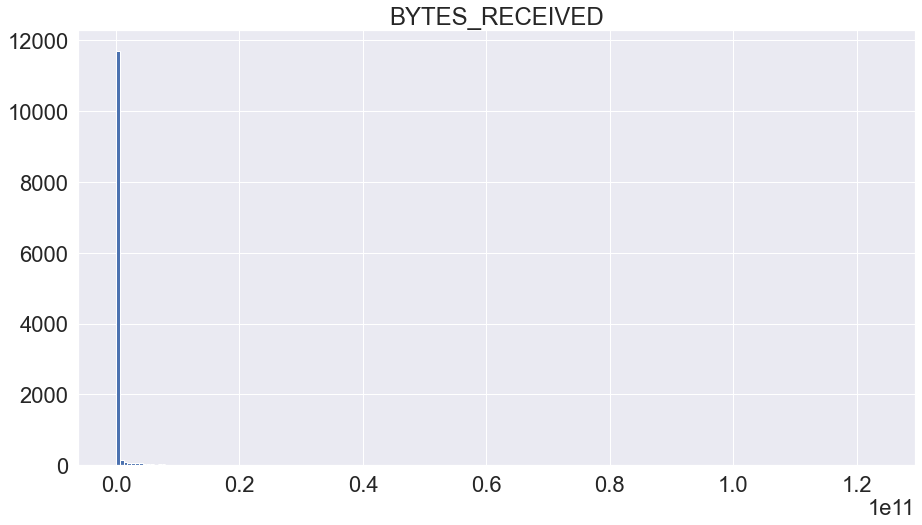

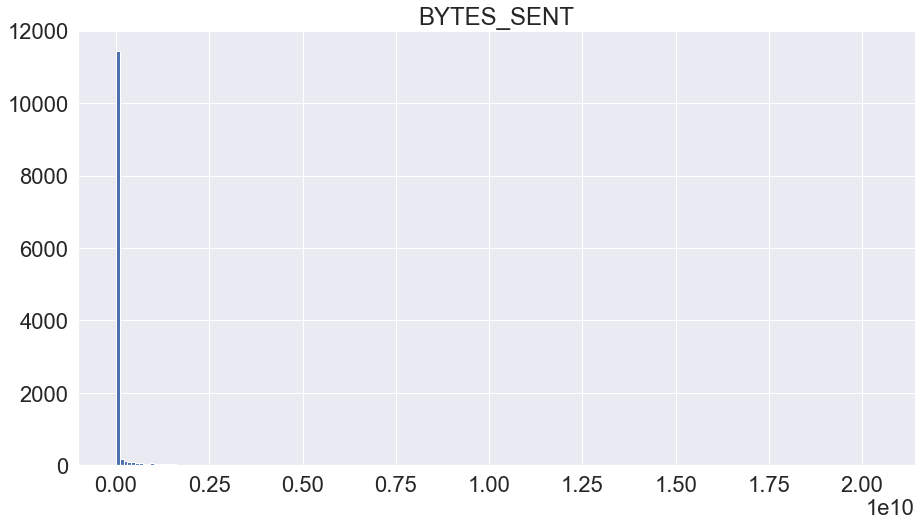

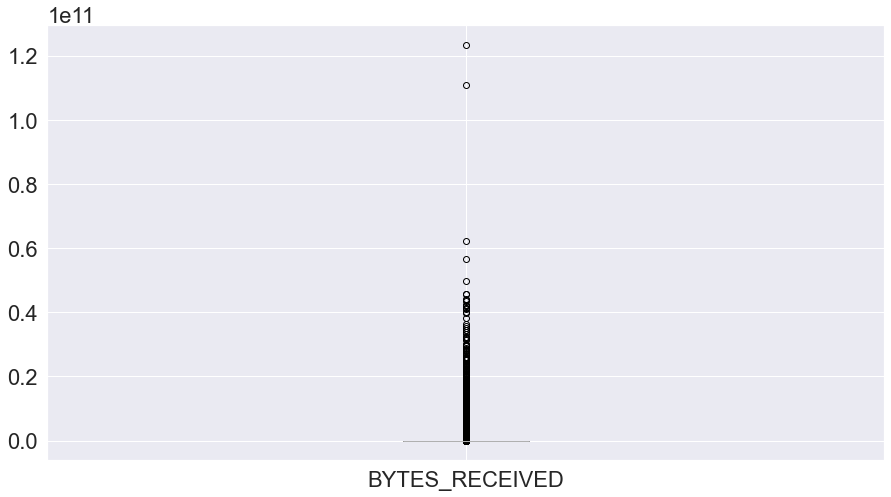

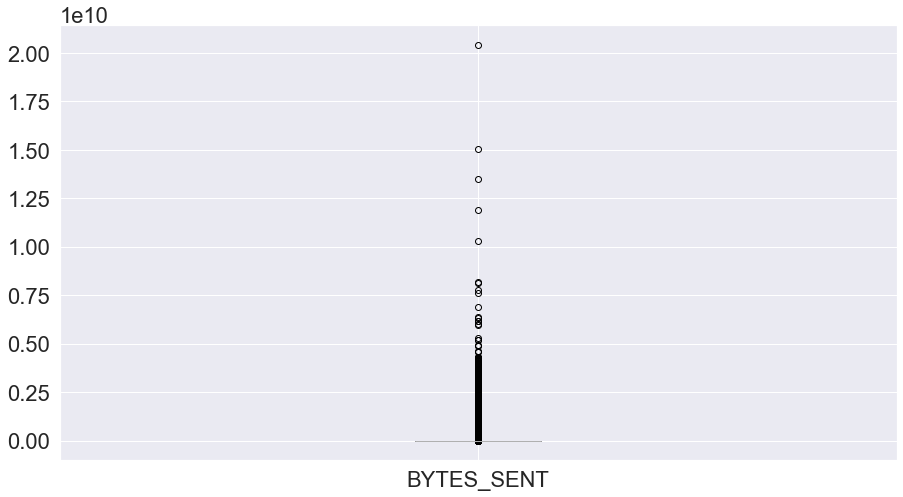

In [285]:
print(df['BYTES_RECEIVED'].value_counts().count())
print(df['BYTES_SENT'].value_counts().count())

#plt.figure(figsize=(15, 8))
plt.rcParams['figure.figsize'] = (15, 8)

df.hist(column=['BYTES_RECEIVED'],bins=200);
plt.show()
df.hist(column=[ 'BYTES_SENT'],bins=200);
plt.show()
df.boxplot(column='BYTES_RECEIVED');
plt.show()
df.boxplot(column='BYTES_SENT');
plt.show()

Drop CONNECTED_DEVICES_WAN only 1s

9
2


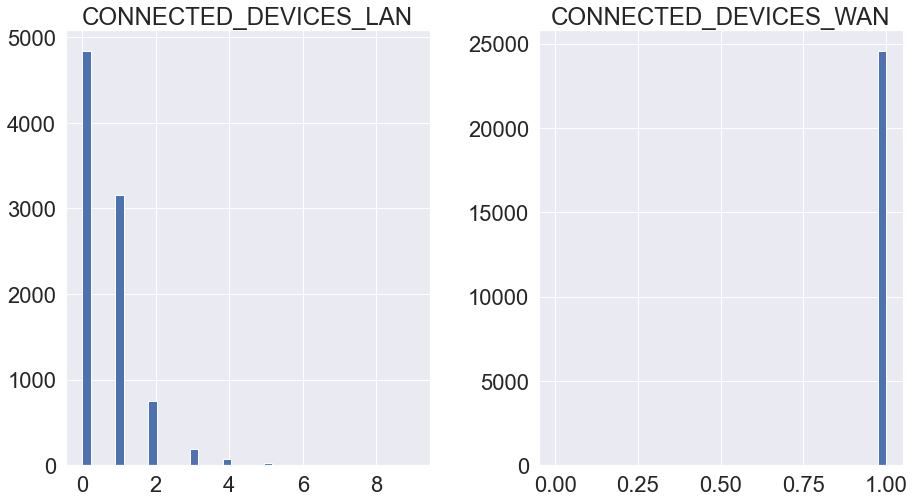

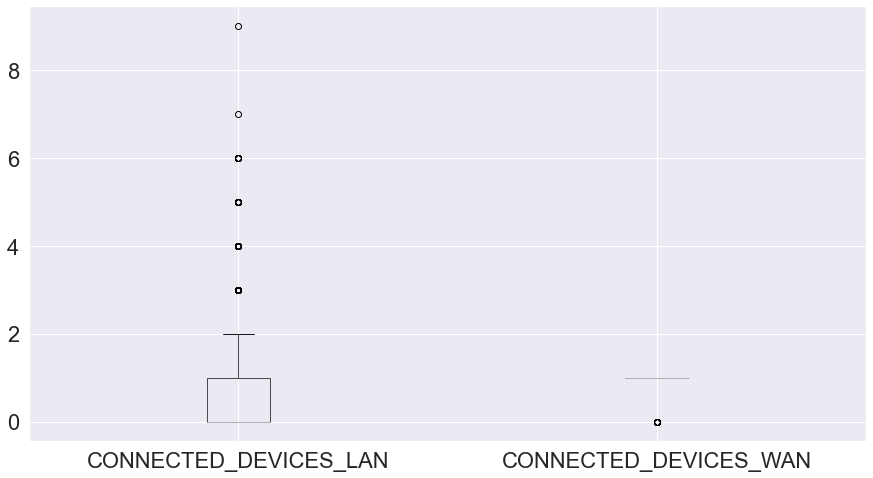

In [269]:
print(df['CONNECTED_DEVICES_LAN'].value_counts().count())
print(df['CONNECTED_DEVICES_WAN'].value_counts().count())
df.hist(column=['CONNECTED_DEVICES_LAN','CONNECTED_DEVICES_WAN'],bins=40);
plt.show()
df.boxplot(column=['CONNECTED_DEVICES_LAN','CONNECTED_DEVICES_WAN']);
plt.show()

DOWNSTREAM_RATE categorical?

3


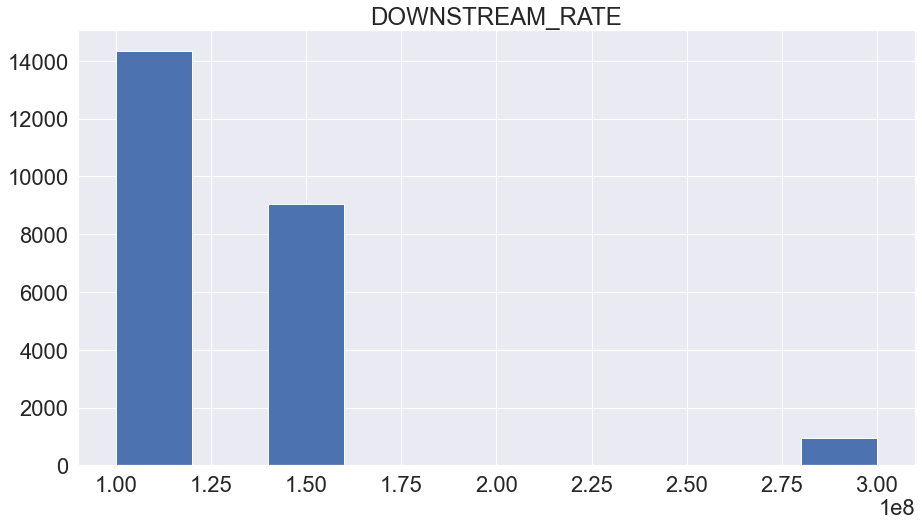

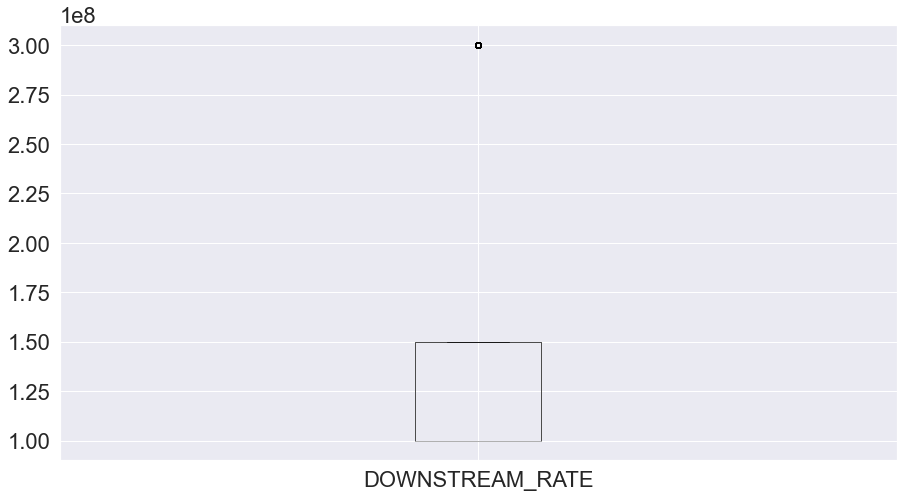

In [270]:
print(df['DOWNSTREAM_RATE'].value_counts().count())
df.hist(column='DOWNSTREAM_RATE',figsize=(15,8),bins=10);
plt.show()
df.boxplot(column='DOWNSTREAM_RATE');
plt.show()

names_categorical.append('DOWNSTREAM_RATE')
names_numerical.remove('DOWNSTREAM_RATE')

9801


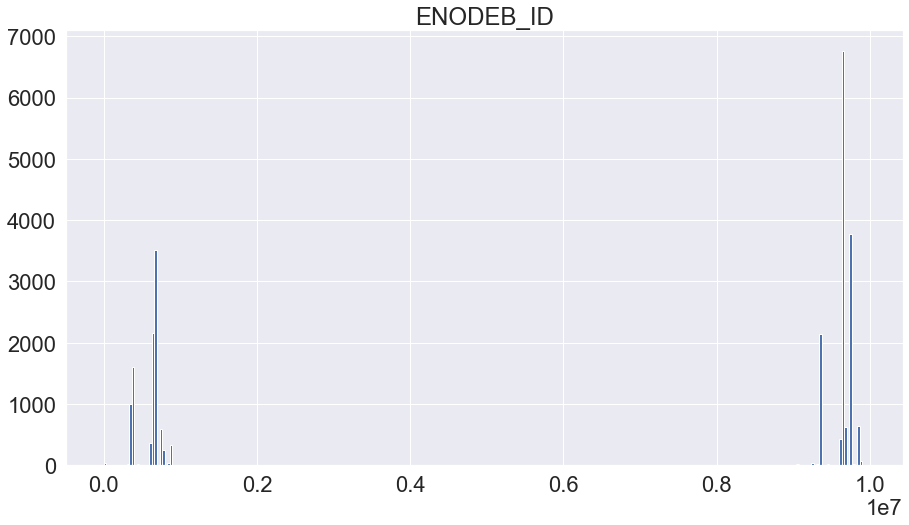

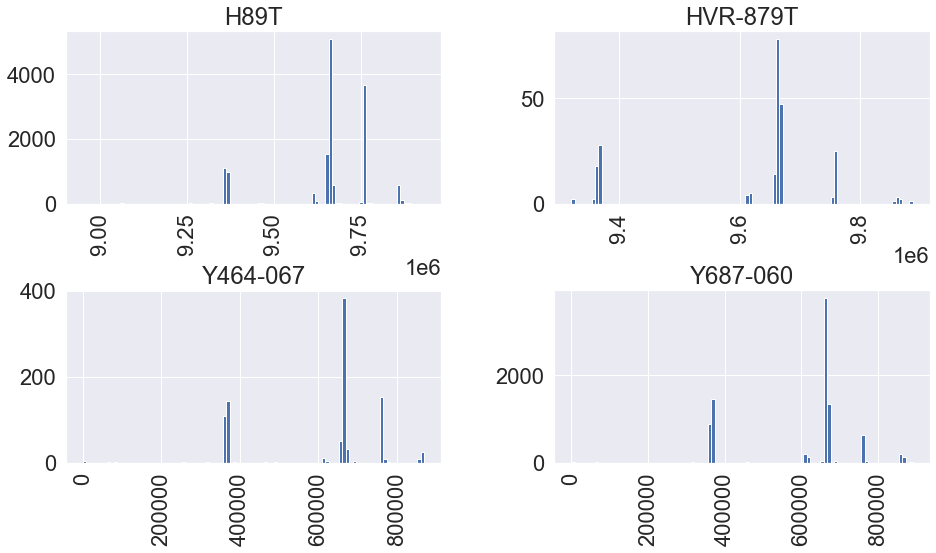

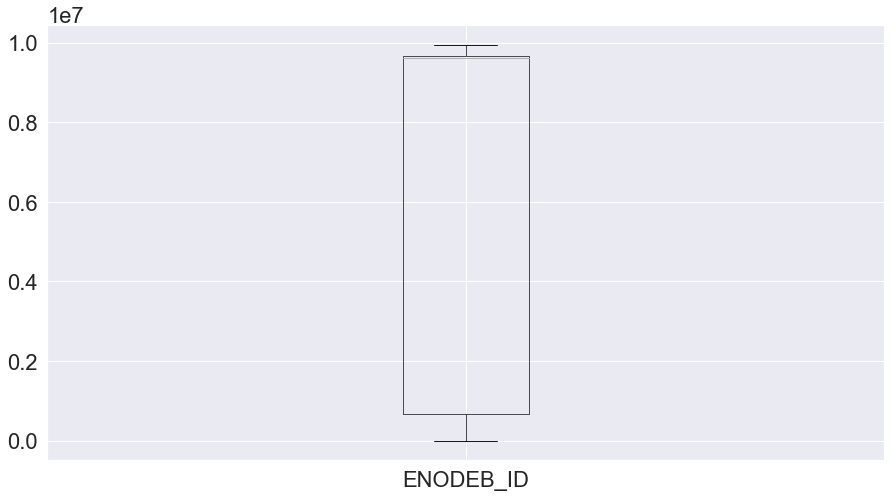

In [292]:
print(df['ENODEB_ID'].value_counts().count())
df.hist(column='ENODEB_ID',bins=300);
plt.show()
df.hist(column='ENODEB_ID',bins=100,by='productclass');
plt.show()
df.boxplot(column='ENODEB_ID');
plt.show()

24495
24531


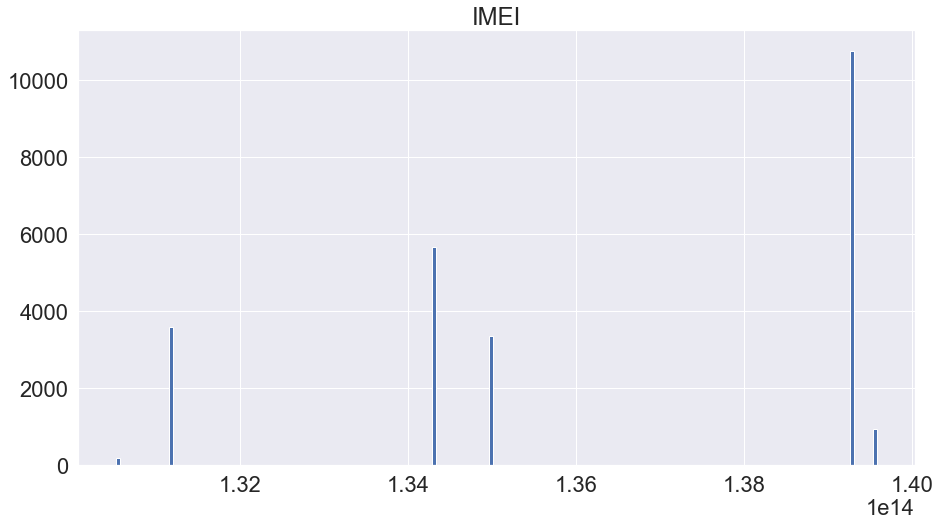

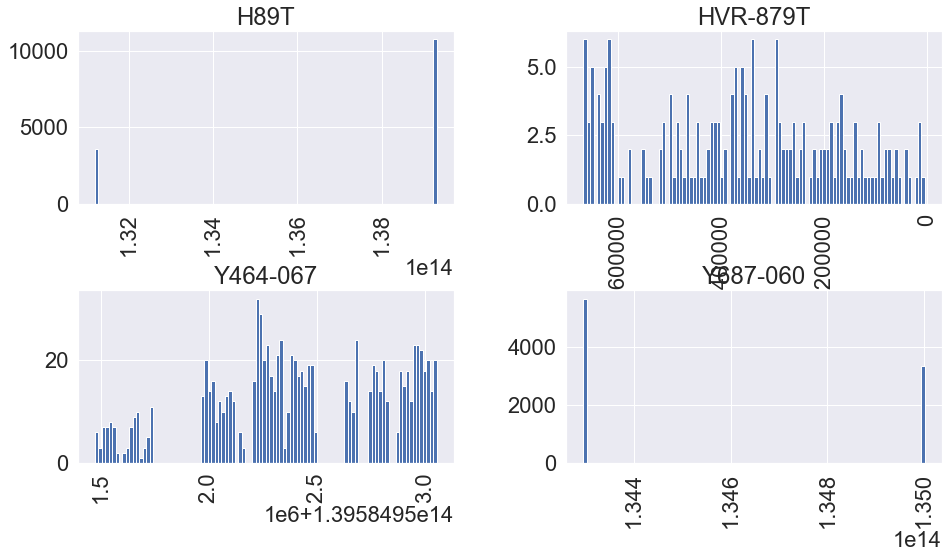

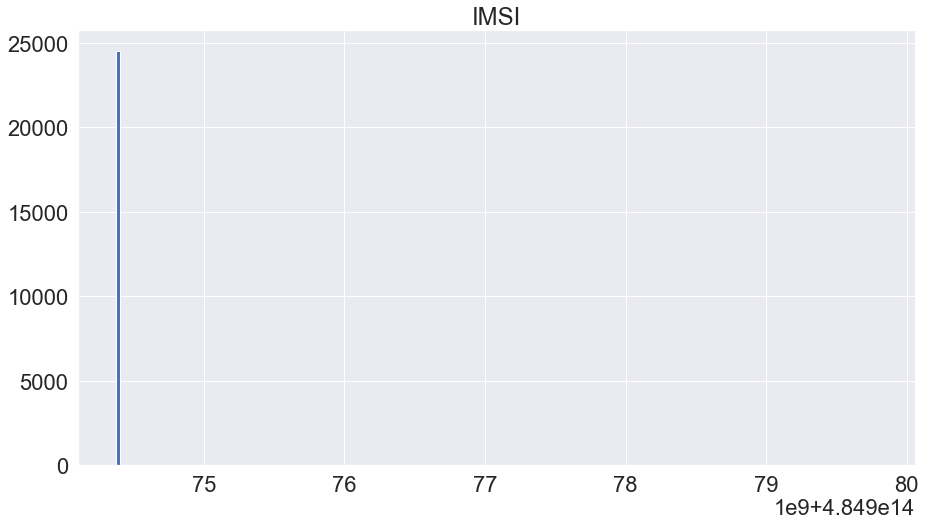

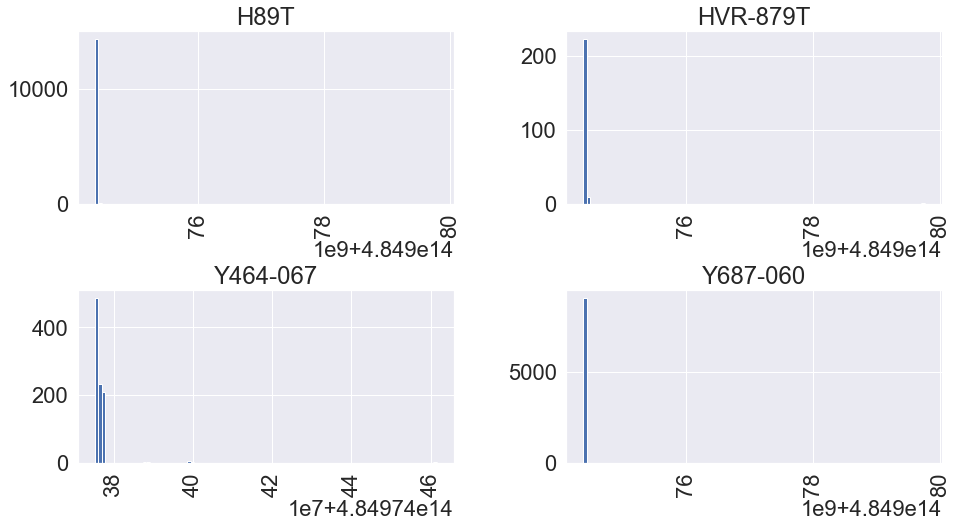

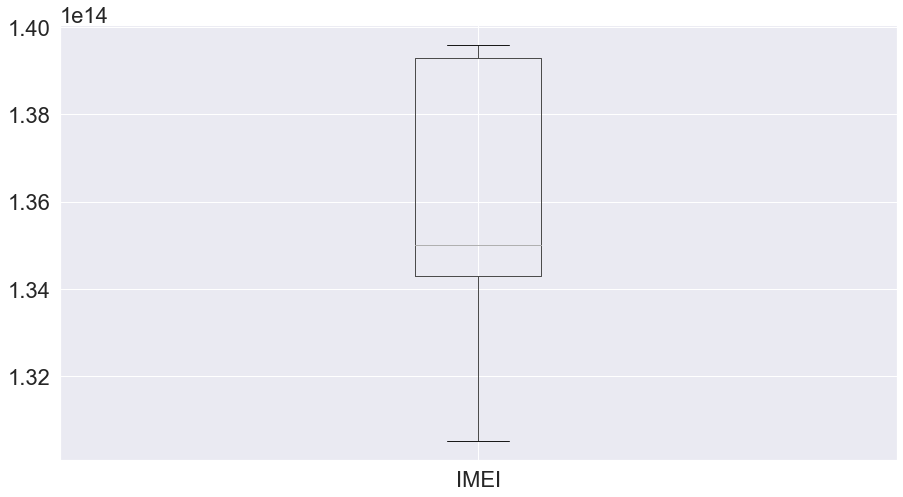

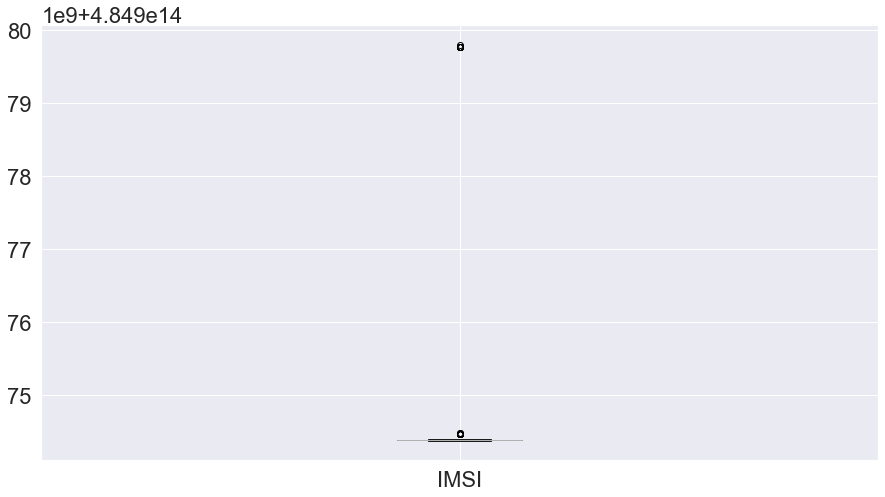

In [294]:
print(df['IMEI'].value_counts().count())
print(df['IMSI'].value_counts().count())
df.hist(column='IMEI',bins=200)
plt.show()
df.hist(column='IMEI',bins=100,by='productclass')
plt.show()
df.hist(column='IMSI',bins=200)
plt.show()
df.hist(column='IMSI',bins=100,by='productclass')
plt.show()

df.boxplot(column='IMEI');
plt.show()
df.boxplot(column='IMSI');
plt.show()

In [228]:
sns.violinplot(ax=ax,x=df.IMSI,y=df.productclass);

61
421


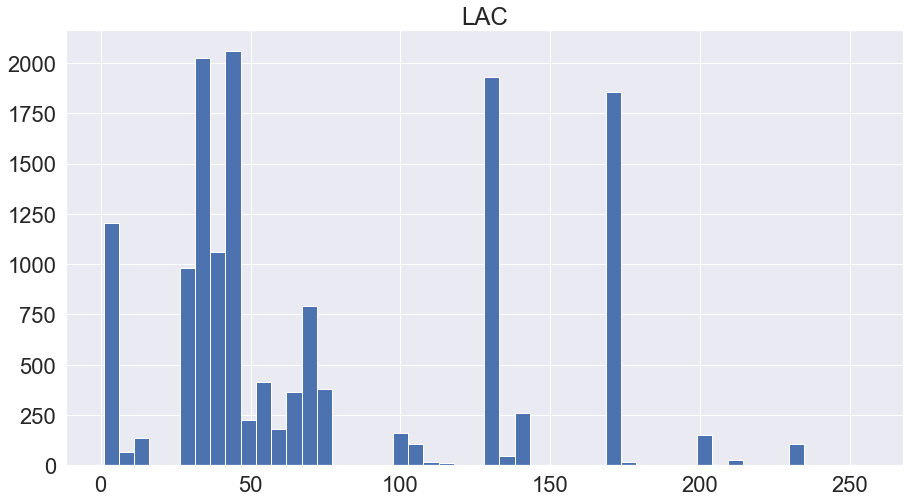

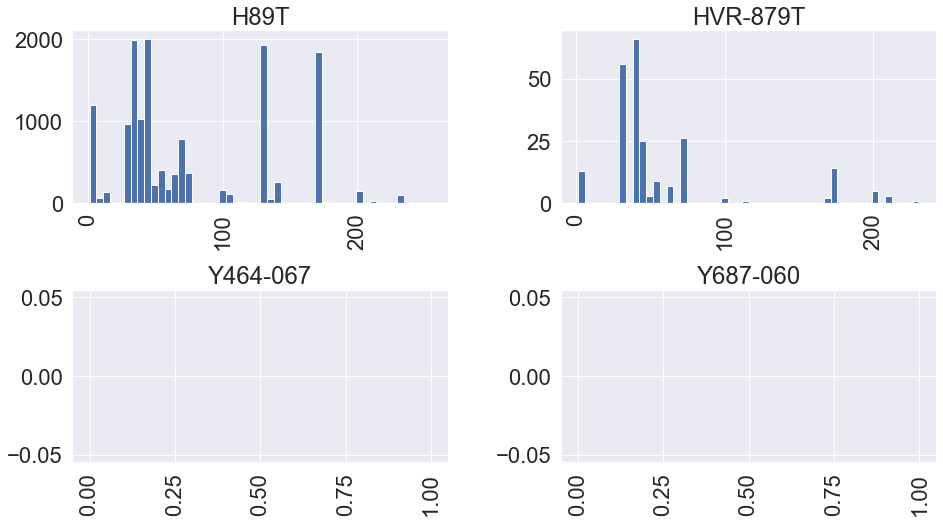

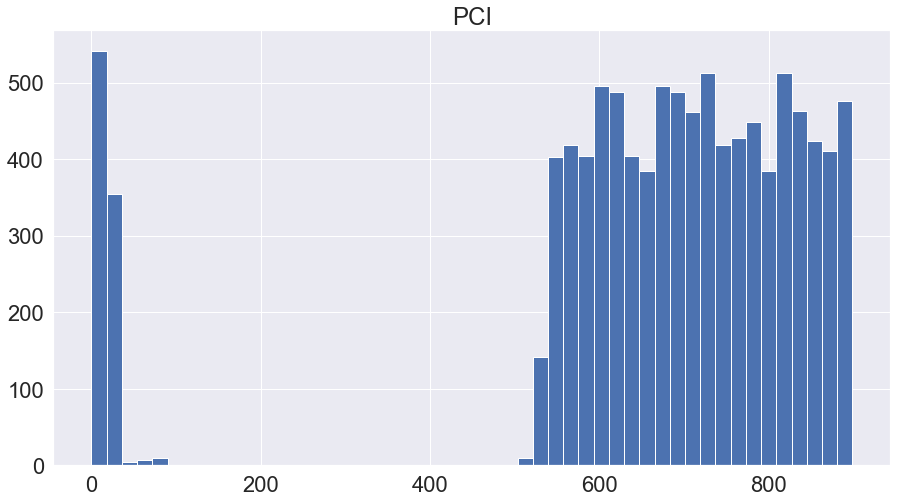

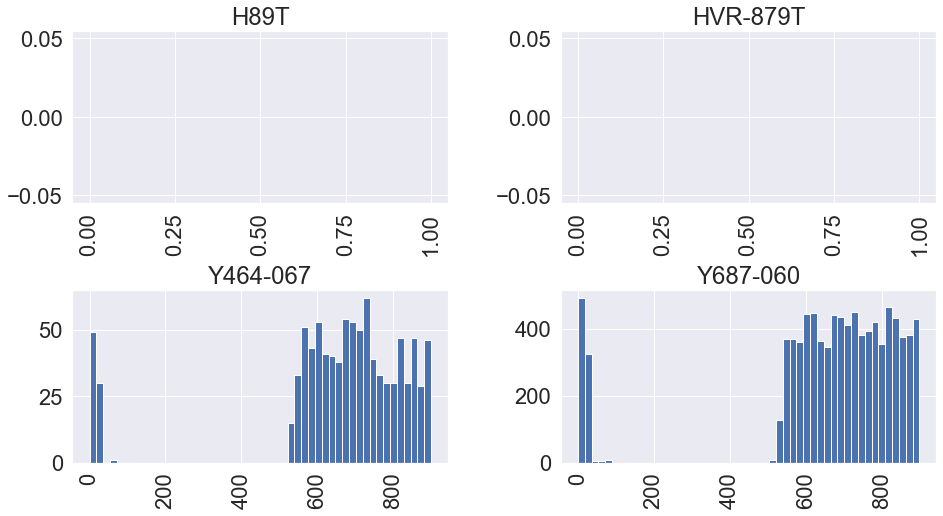

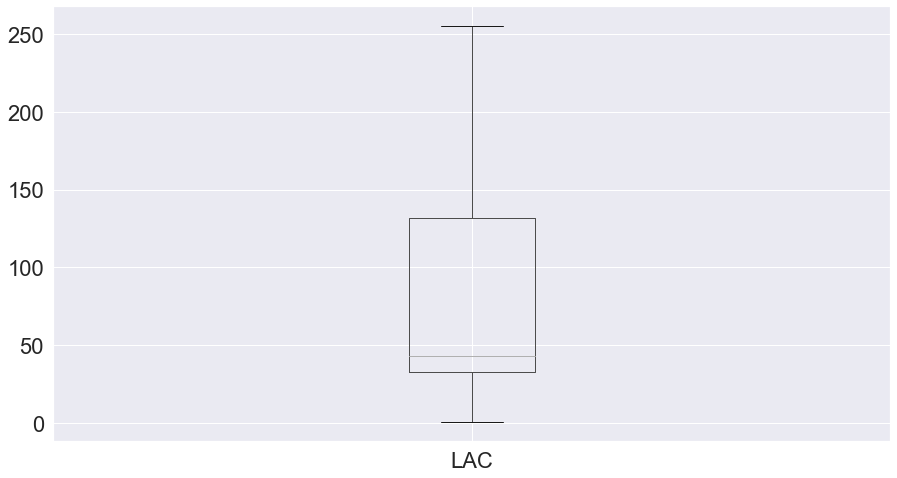

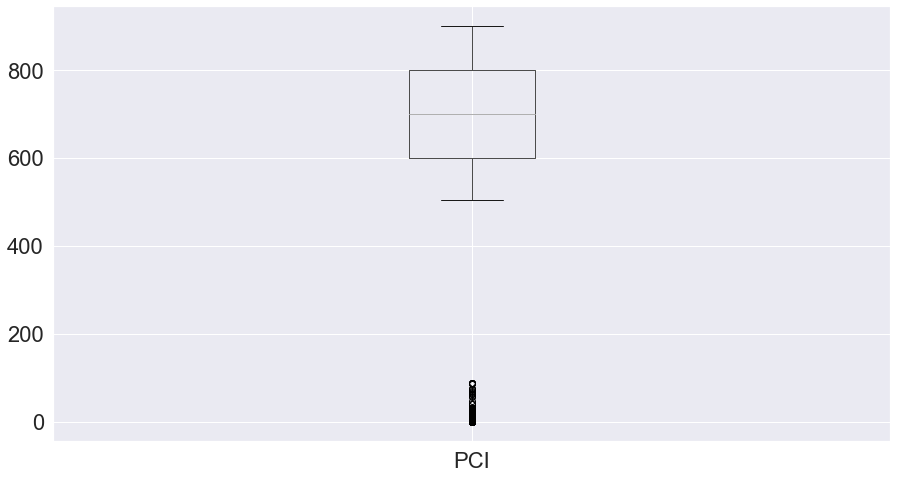

In [295]:
print(df['LAC'].value_counts().count())
print(df['PCI'].value_counts().count())
df.hist(column='LAC',figsize=(15,8),bins=50)
plt.show()
df.hist(column='LAC',figsize=(15,8),bins=50,by=df.productclass)
plt.show()
df.hist(column='PCI',figsize=(15,8),bins=50)
plt.show()
df.hist(column='PCI',figsize=(15,8),bins=50,by=df.productclass)
plt.show()
df.boxplot(column='LAC');
plt.show()
df.boxplot(column='PCI');
plt.show()


83
38
102
82


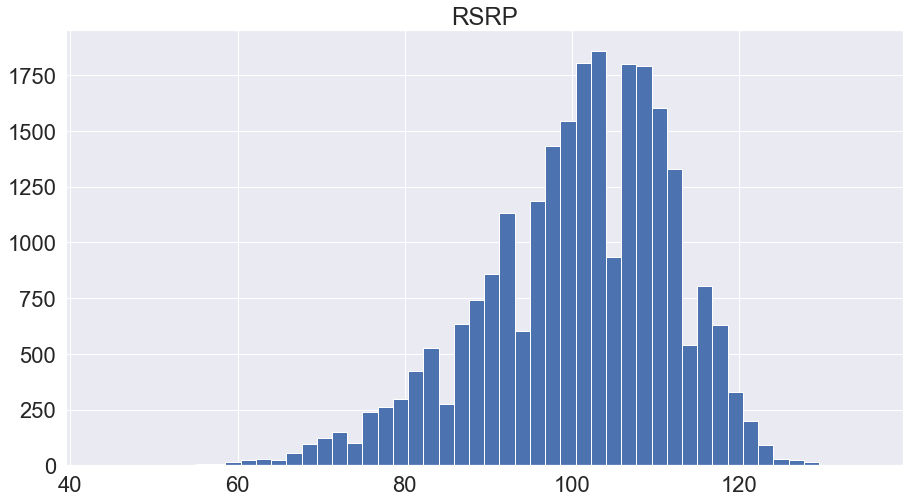

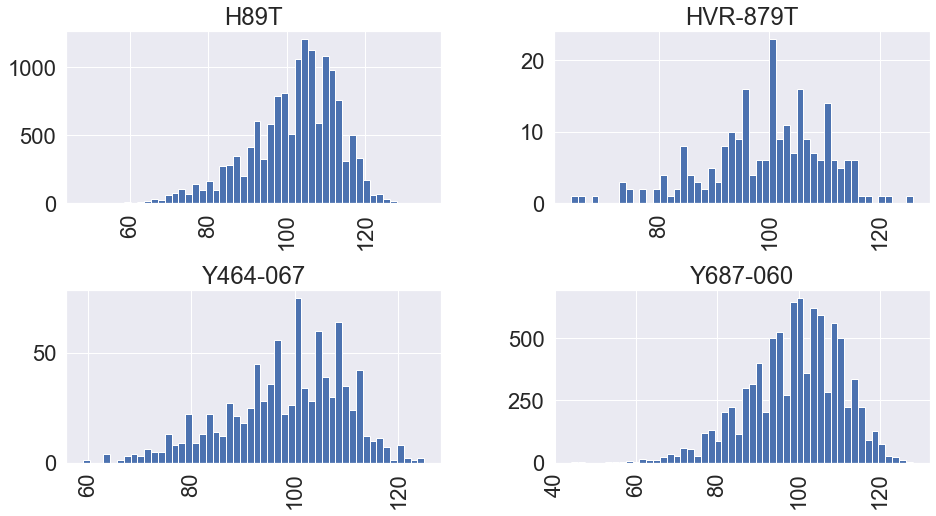

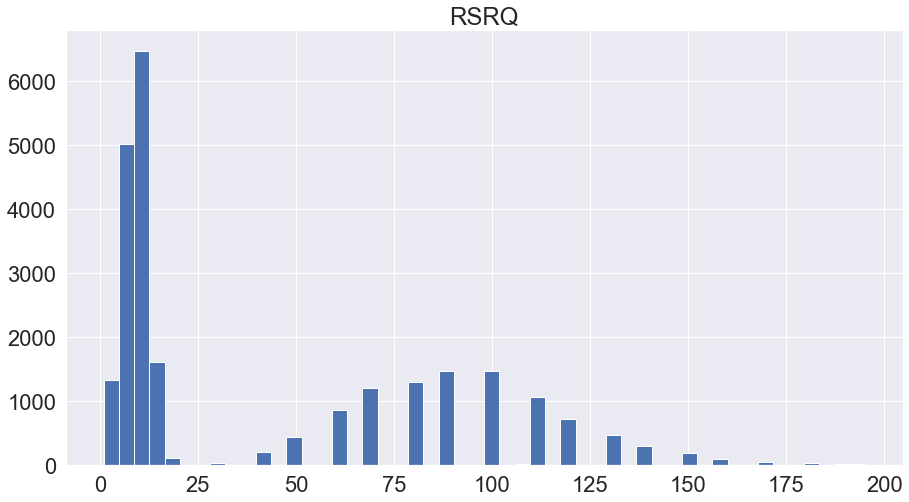

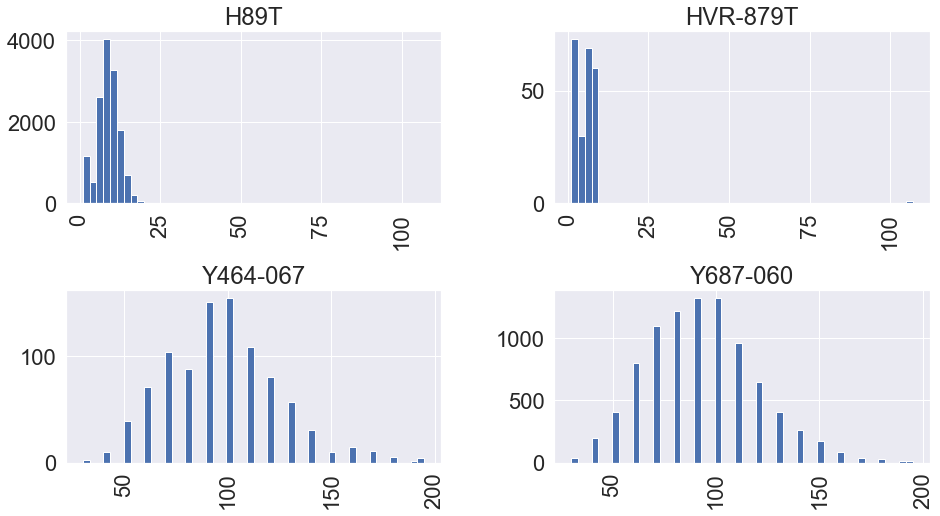

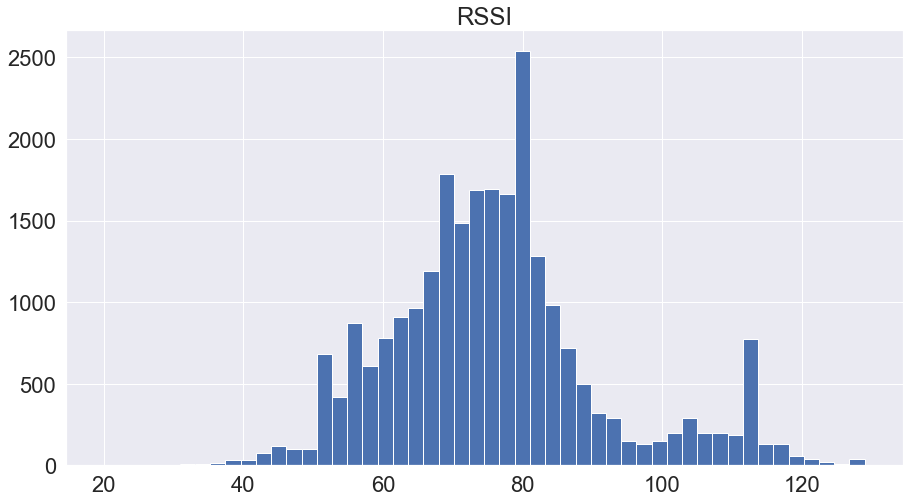

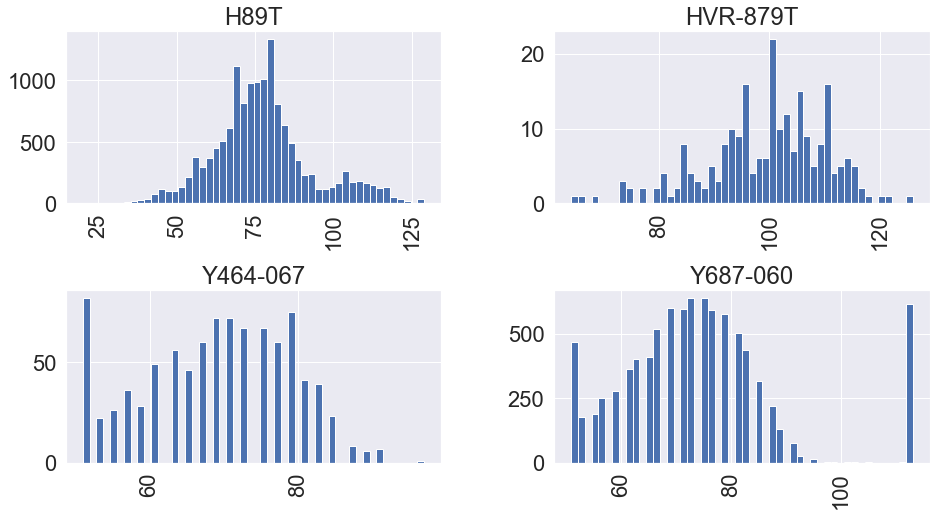

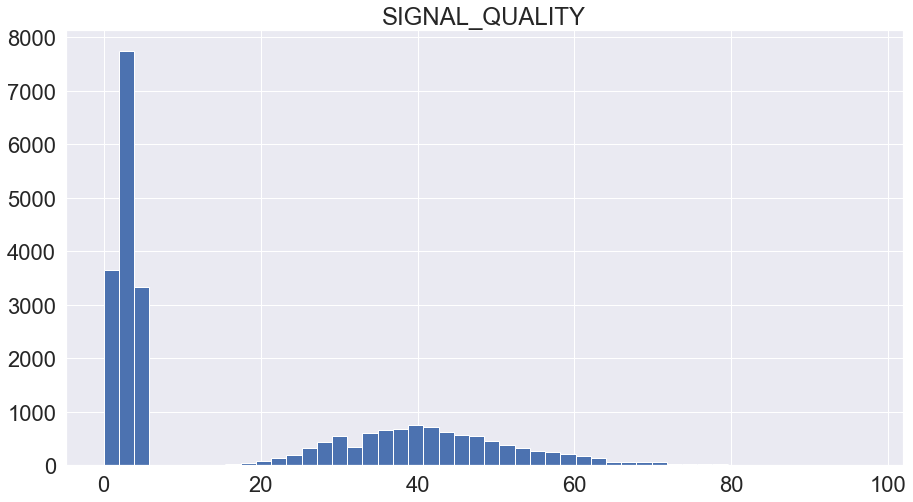

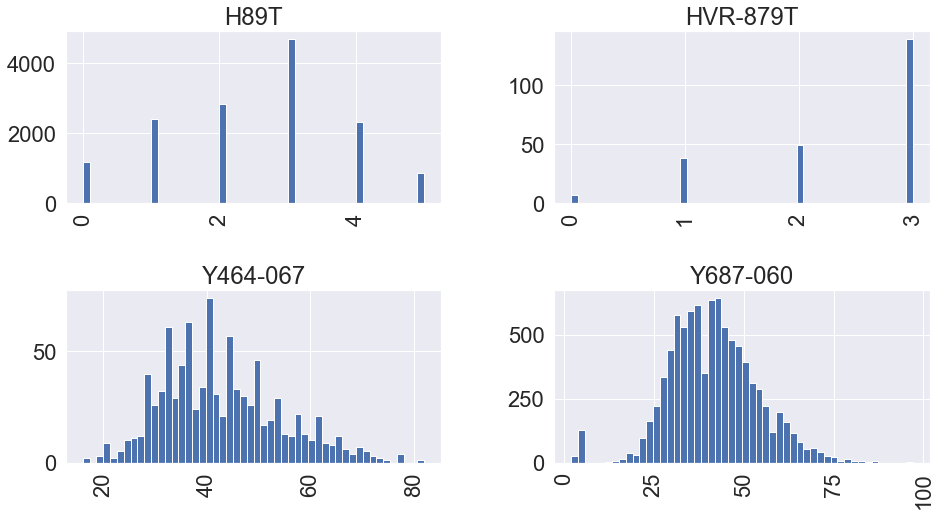

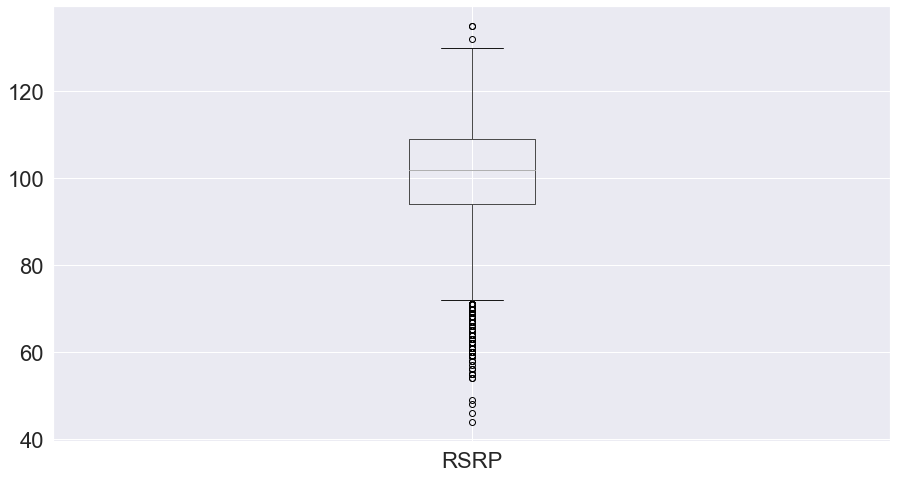

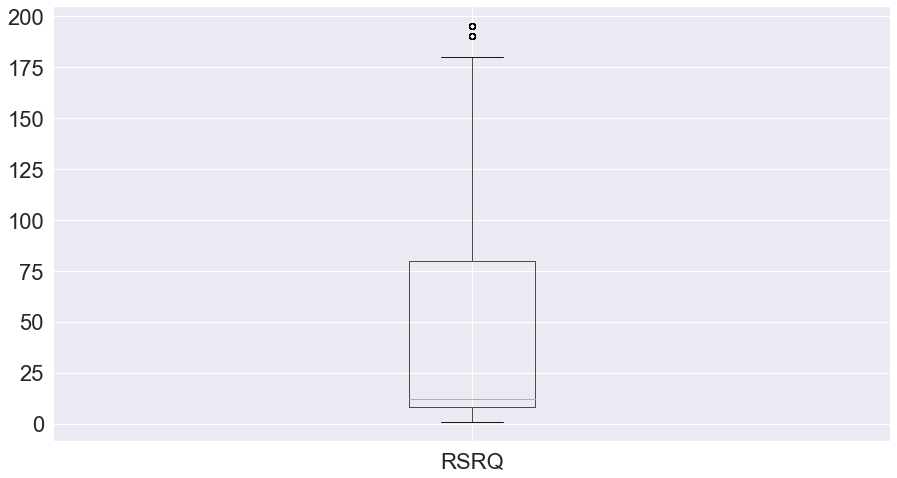

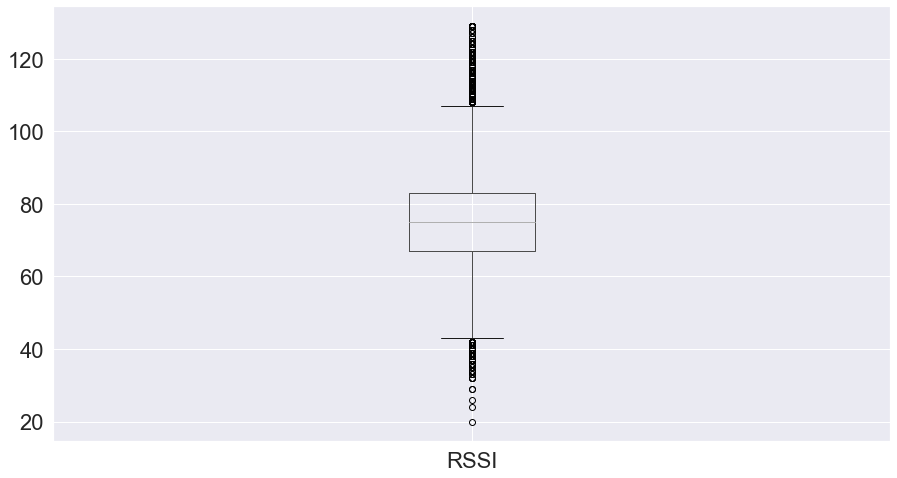

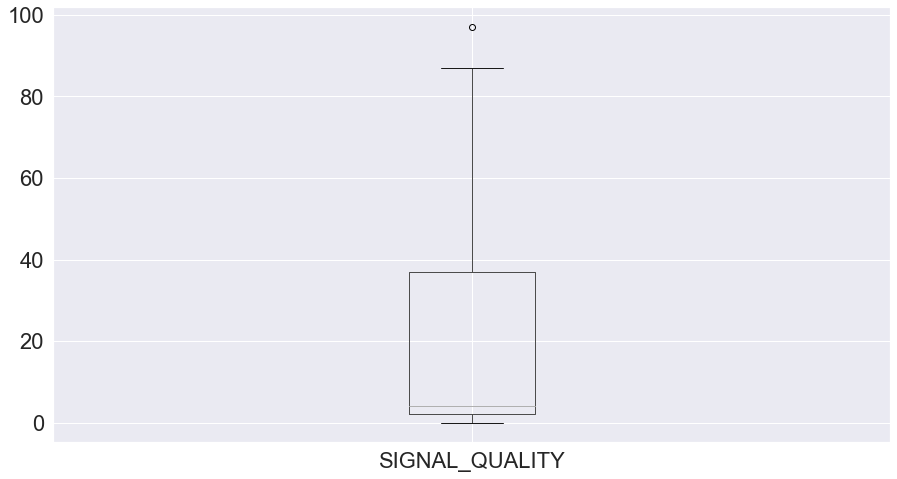

In [296]:
print(df['RSRP'].value_counts().count())
print(df['RSRQ'].value_counts().count())
print(df['RSSI'].value_counts().count())
print(df['SIGNAL_QUALITY'].value_counts().count())
#print(df.hist(column=['RSRP', 'RSRQ', 'RSSI','SIGNAL_QUALITY'],figsize=(15,8),bins=50,by=df.productclass,legend=True))
df.hist(column=['RSRP'],bins=50,legend=False)
plt.show()
df.hist(column=['RSRP'],bins=50,by=df.productclass,legend=False)
plt.show()
df.hist(column=['RSRQ'],bins=50,legend=False)
plt.show()
df.hist(column=['RSRQ'],bins=50,by=df.productclass,legend=False)
plt.show()
df.hist(column=['RSSI'],bins=50,legend=False)
plt.show()
df.hist(column=['RSSI'],bins=50,by=df.productclass,legend=False)
plt.show()
df.hist(column=['SIGNAL_QUALITY'],bins=50,legend=False)
plt.show()
df.hist(column=['SIGNAL_QUALITY'],bins=50,by=df.productclass,legend=False)
plt.show()

df.boxplot(column='RSRP');
plt.show()
df.boxplot(column='RSRQ');
plt.show()
df.boxplot(column='RSSI');
plt.show()
df.boxplot(column='SIGNAL_QUALITY');
plt.show()




In [181]:
df['SINR'].describe()

count    18669.000000
mean        10.298248
std         35.264679
min          0.000000
25%          4.000000
50%          8.000000
75%         14.000000
max       2380.000000
Name: SINR, dtype: float64

61


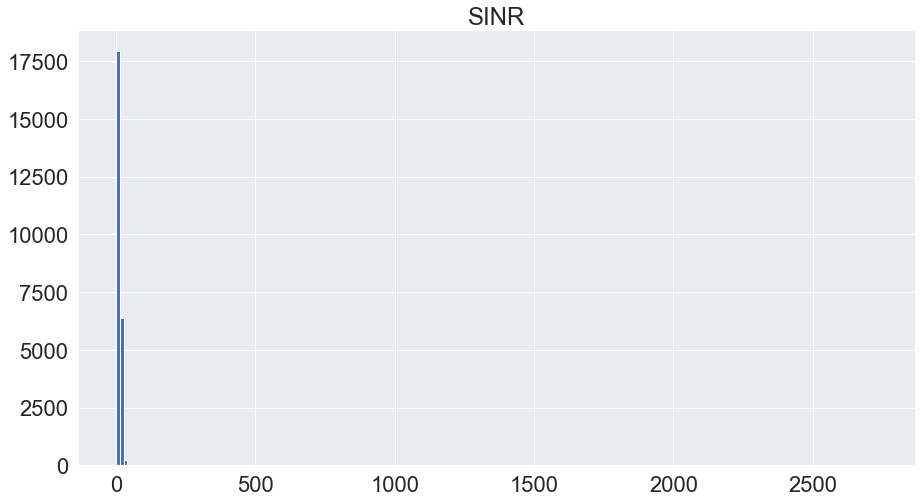

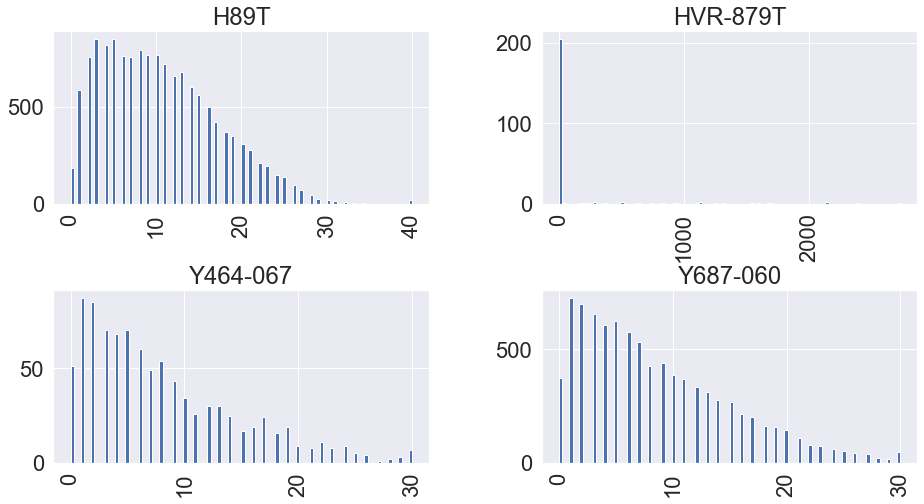

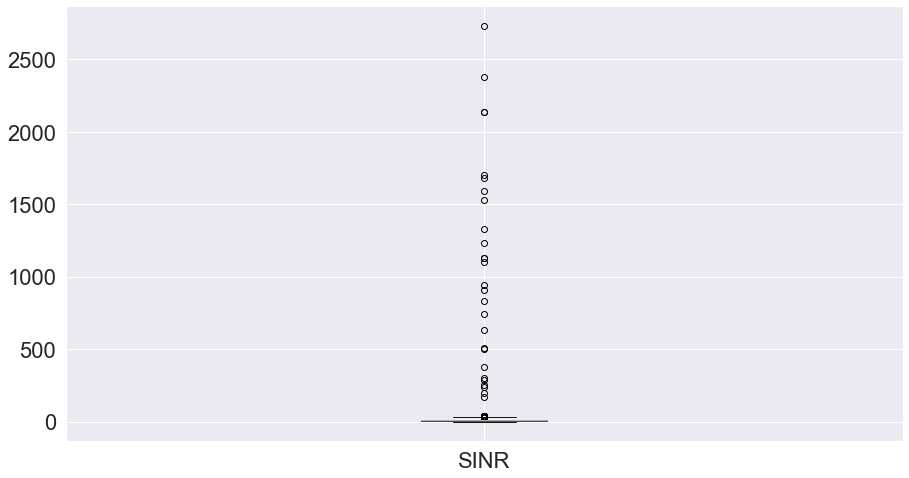

In [299]:
print(df['SINR'].value_counts().count())
df.hist(column='SINR',bins=200)
plt.show()
df.hist(column='SINR',bins=100,by=df.productclass)
plt.show()
df.boxplot(column='SINR');
#sns.violinplot(x=df["SINR"])
plt.show()

1441


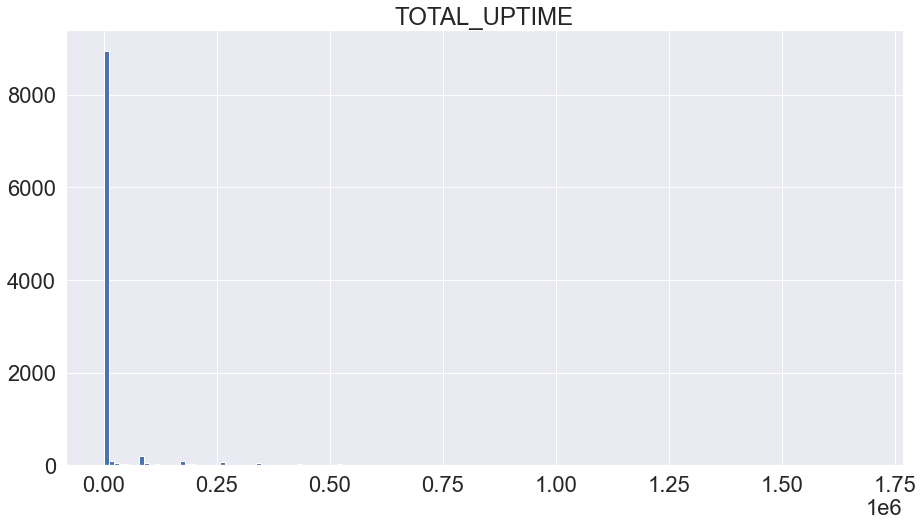

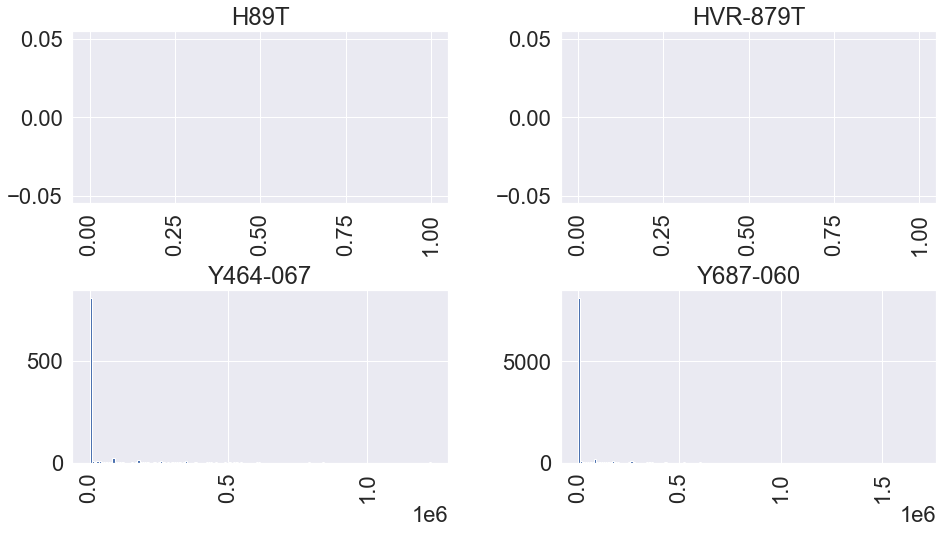

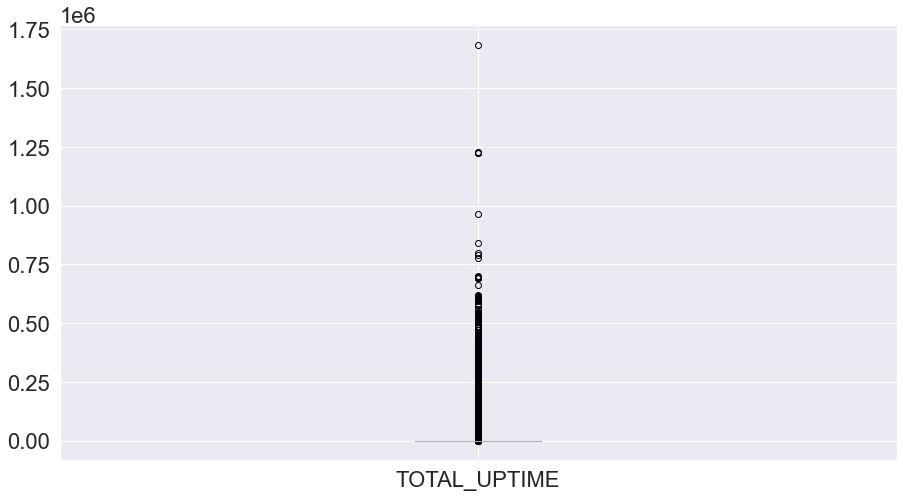

In [301]:

print(df['TOTAL_UPTIME'].value_counts().count())
df.hist(column='TOTAL_UPTIME',figsize=(15,8),bins=150)
plt.show()
df.hist(column='TOTAL_UPTIME',bins=150,by=df.productclass)
plt.show()
df.boxplot(column='TOTAL_UPTIME');
#sns.violinplot(x=df["TOTAL_UPTIME"])
plt.show()

#print(df.boxplot(column='TOTAL_UPTIME',figsize=(15,8)))



9052


[]

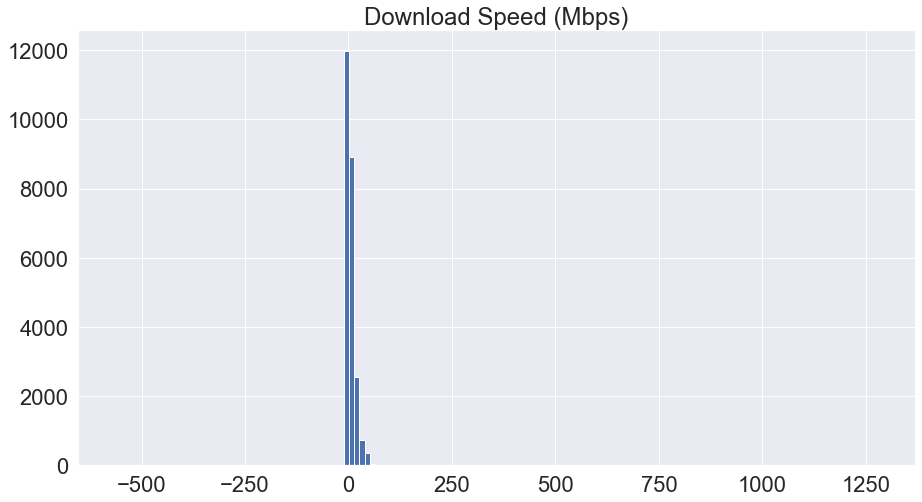

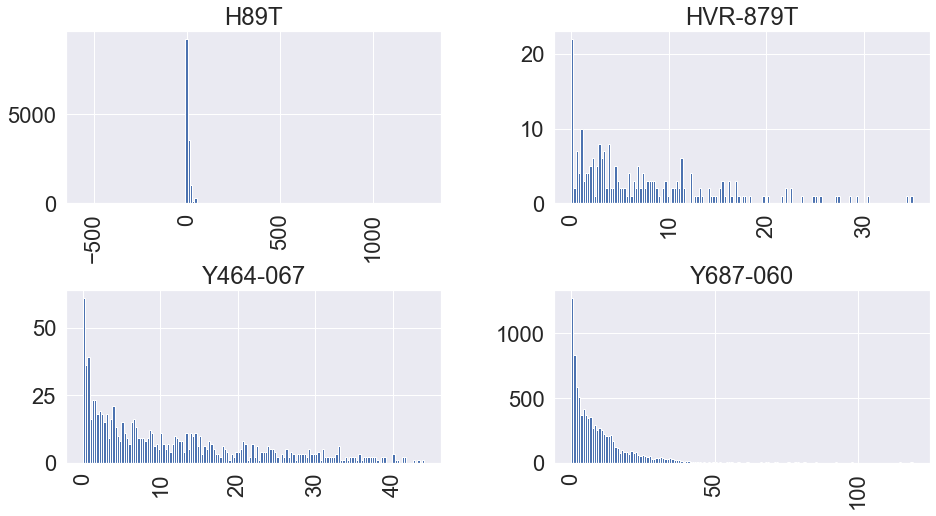

In [303]:
#        'LAC', 'PCI', 'RSRP', 'RSRQ', 'RSSI', 'SIGNAL_QUALITY', 'SINR',
#        'TOTAL_UPTIME', 'Timestamp', 'UPSTREAM_RATE', 'Download Speed (Mbps)'

# print(df['LAC'].value_counts())
print(df['Download Speed (Mbps)'].value_counts().count())
df.hist(column='Download Speed (Mbps)',figsize=(15,8),bins=150)
plt.plot()
df.hist(column='Download Speed (Mbps)',figsize=(15,8),bins=150,by=df.productclass)
plt.plot()

In [201]:
df.isnull().sum()

created                      0
productclass                 0
serial                       0
BYTES_RECEIVED           11928
BYTES_SENT               11892
CELL_ID                     24
CONNECTED_DEVICES_LAN    15531
CONNECTED_DEVICES_WAN       14
DOWNSTREAM_RATE            256
ENODEB_ID                   22
EXTERNAL_ANTENNA1          255
EXTERNAL_ANTENNA2         9294
FIRMWARE_VERSION            19
IMEI                        57
IMSI                        23
LAC                      10003
MODEL                       19
NETWORK_PRIORITY            25
PCI                      14591
PLMN                        22
PRODUCT_CLASS               24
ROAM_STATUS                 21
RSRP                        24
RSRQ                        23
RSSI                        22
SERVICE_STATUS           14592
SIGNAL_QUALITY              21
SINR                        21
Serial_x                 24539
TOTAL_UPTIME             14592
Timestamp                24574
UPSTREAM_RATE              255
Serial_y

In [104]:
import numpy as np

#created	name	productclass	serial	value

zipfile1 = 'Jan26_Data.txt.zip'

filename = 'Jan26_Data.txt'

# parameter_defaults = {
# 'Serial':'1',
# 'Timestamp':'2',
# 'MODEL':'3',
# 'PRODUCT_CLASS':'4',
# 'FIRMWARE_VERSION':'5',
# 'TOTAL_UPTIME':'6',
# 'IMEI':'7',
# 'IMSI':'8'
# ,'CELL_ID':'9',
# 'ENODEB_ID':'10',
# 'LAC':'11'
# ,'PCI':'12',
# 'DOWNSTREAM_RATE':'13',
# 'UPSTREAM_RATE':'14',
# 'PLMN':'15',
# 'RSRP':'16',
# 'RSRQ':'17',
# 'RSSI':'18',
# 'SINR':'19',
# 'SIGNAL_QUALITY':'20',
# 'BYTES_RECEIVED':'21',
# 'BYTES_SENT':'22',
# 'ROAM_STATUS':'23',
# 'SERVICE_STATUS':'24',
# 'CONNECTED_DEVICES_WAN':'25',
# 'CONNECTED_DEVICES_LAN':'26',
# 'NETWORK_PRIORITY':'27',
# 'EXTERNAL_ANTENNA1':'28',
# 'EXTERNAL_ANTENNA2':'29'
# }


parameter_defaults = {
'Serial':np.nan,
'Timestamp':np.nan,
'MODEL':np.nan,
'PRODUCT_CLASS':np.nan,
'FIRMWARE_VERSION':np.nan,
'TOTAL_UPTIME':np.nan,
'IMEI':np.nan,
'IMSI':np.nan,
'CELL_ID':np.nan,
'ENODEB_ID':np.nan,
'LAC':np.nan,
'PCI':np.nan,
'DOWNSTREAM_RATE':np.nan,
'UPSTREAM_RATE':np.nan,
'PLMN':np.nan,
'RSRP':np.nan,
'RSRQ':np.nan,
'RSSI':np.nan,
'SINR':np.nan,
'SIGNAL_QUALITY':np.nan,
'BYTES_RECEIVED':np.nan,
'BYTES_SENT':np.nan,
'ROAM_STATUS':np.nan,
'SERVICE_STATUS':np.nan,
'CONNECTED_DEVICES_WAN':np.nan,
'CONNECTED_DEVICES_LAN':np.nan,
'NETWORK_PRIORITY':np.nan,
'EXTERNAL_ANTENNA1':np.nan,
'EXTERNAL_ANTENNA2':np.nan
}

map_YXXX_XXX = {  #map_Y464_067,map_Y687_060
'InternetGatewayDevice.DeviceInfo.SerialNumber':'Serial',
#Timestamp	
'InternetGatewayDevice.DeviceInfo.ModelName':'MODEL',	
'InternetGatewayDevice.DeviceInfo.ProductClass':'PRODUCT_CLASS',
'InternetGatewayDevice.DeviceInfo.SoftwareVersion':'FIRMWARE_VERSION',	
'InternetGatewayDevice.DeviceInfo.UpTime':'TOTAL_UPTIME',	
'InternetGatewayDevice.WANDevice.*.X_ATP_WANUMTSInterfaceConfig.IMEI':'IMEI',	
'InternetGatewayDevice.WANDevice.*.X_ATP_WANUMTSInterfaceConfig.IMSI':'IMSI',	
'InternetGatewayDevice.WANDevice.*.X_ATP_WANUMTSInterfaceConfig.cellID':'CELL_ID',	
'InternetGatewayDevice.WANDevice.*.X_ATP_WANUMTSInterfaceConfig.eNodeBId':'ENODEB_ID',	
'InternetGatewayDevice.WANDevice.*.X_ATP_WANUMTSInterfaceConfig.LAC':'LAC',	
'InternetGatewayDevice.WANDevice.*.X_ATP_WANUMTSInterfaceConfig.PCI':'PCI',	
'InternetGatewayDevice.WANDevice.*.X_ATP_WANUMTSInterfaceConfig.DownstreamMaxRate':'DOWNSTREAM_RATE',	
'InternetGatewayDevice.WANDevice.*.X_ATP_WANUMTSInterfaceConfig.UpstreamMaxRate':'UPSTREAM_RATE',	
'InternetGatewayDevice.WANDevice.*.X_ATP_WANUMTSInterfaceConfig.PLMN':'PLMN',	
'InternetGatewayDevice.WANDevice.*.X_ATP_WANUMTSInterfaceConfig.RSRP':'RSRP',	
'InternetGatewayDevice.WANDevice.*.X_ATP_WANUMTSInterfaceConfig.RSRQ':'RSRQ',	
'InternetGatewayDevice.WANDevice.*.X_ATP_WANUMTSInterfaceConfig.RSSI':'RSSI',	
'InternetGatewayDevice.WANDevice.*.X_ATP_WANUMTSInterfaceConfig.SINR':'SINR',	
'InternetGatewayDevice.WANDevice.*.X_ATP_WANUMTSInterfaceConfig.SignalQuality':'SIGNAL_QUALITY',	
'InternetGatewayDevice.WANDevice.*.X_ATP_WANUMTSInterfaceConfig.Stats.BytesReceived':'BYTES_RECEIVED',	
'InternetGatewayDevice.WANDevice.*.X_ATP_WANUMTSInterfaceConfig.Stats.BytesSent':'BYTES_SENT',	
'InternetGatewayDevice.WANDevice.*.X_ATP_WANUMTSInterfaceConfig.RoamStatus':'ROAM_STATUS',	
'InternetGatewayDevice.WANDevice.*.X_ATP_WANUMTSInterfaceConfig.ServiceStatus':'SERVICE_STATUS',	
'InternetGatewayDevice.WANDevice.*.WANCommonInterfaceConfig.NumberOfActiveConnections':'CONNECTED_DEVICES_WAN',	
'InternetGatewayDevice.LANDevice.*.Hosts.Host.*.Active':'CONNECTED_DEVICES_LAN',	
'InternetGatewayDevice.Services.X_ATP_NetworkSetting.NetworkPriority':'NETWORK_PRIORITY',
'InternetGatewayDevice.DeviceInfo.X_ATP_Antenna.AntennaStatus1':'EXTERNAL_ANTENNA1',	
'InternetGatewayDevice.DeviceInfo.X_ATP_Antenna.AntennaStatus2':'EXTERNAL_ANTENNA2'}


# map_Y687_060 = {
#  'InternetGatewayDevice.DeviceInfo.SerialNumber':'Serial',
# #'':'Timestamp',
# 'InternetGatewayDevice.DeviceInfo.ModelName':'MODEL',
# 'InternetGatewayDevice.DeviceInfo.ProductClass':'PRODUCT_CLASS',
# 'InternetGatewayDevice.DeviceInfo.SoftwareVersion':'FIRMWARE_VERSION',
# 'InternetGatewayDevice.DeviceInfo.UpTime':'TOTAL_UPTIME',
# 'InternetGatewayDevice.WANDevice.*.X_ATP_WANUMTSInterfaceConfig.IMEI':'IMEI',
# 'InternetGatewayDevice.WANDevice.*.X_ATP_WANUMTSInterfaceConfig.IMSI':'IMSI',
# 'InternetGatewayDevice.WANDevice.*.X_ATP_WANUMTSInterfaceConfig.cellID':'CELL_ID',
# 'InternetGatewayDevice.WANDevice.*.X_ATP_WANUMTSInterfaceConfig.eNodeBId':'ENODEB_ID',
# 'InternetGatewayDevice.WANDevice.*.X_ATP_WANUMTSInterfaceConfig.LAC':'LAC',
# 'InternetGatewayDevice.WANDevice.*.X_ATP_WANUMTSInterfaceConfig.PCI':'PCI',
# 'InternetGatewayDevice.WANDevice.*.X_ATP_WANUMTSInterfaceConfig.DownstreamMaxRate':'DOWNSTREAM_RATE',
# 'InternetGatewayDevice.WANDevice.*.X_ATP_WANUMTSInterfaceConfig.UpstreamMaxRate':'UPSTREAM_RATE',
# 'InternetGatewayDevice.WANDevice.*.X_ATP_WANUMTSInterfaceConfig.PLMN':'PLMN',
# 'InternetGatewayDevice.WANDevice.*.X_ATP_WANUMTSInterfaceConfig.RSRP':'RSRP',
# 'InternetGatewayDevice.WANDevice.*.X_ATP_WANUMTSInterfaceConfig.RSRQ':'RSRQ',
# 'InternetGatewayDevice.WANDevice.*.X_ATP_WANUMTSInterfaceConfig.RSSI':'RSSI',
# 'InternetGatewayDevice.WANDevice.*.X_ATP_WANUMTSInterfaceConfig.SINR':'SINR',
# 'InternetGatewayDevice.WANDevice.*.X_ATP_WANUMTSInterfaceConfig.SignalQuality':'SIGNAL_QUALITY',
# 'InternetGatewayDevice.WANDevice.*.X_ATP_WANUMTSInterfaceConfig.Stats.BytesReceived':'BYTES_RECEIVED',
# 'InternetGatewayDevice.WANDevice.*.X_ATP_WANUMTSInterfaceConfig.Stats.BytesSent':'BYTES_SENT',
# 'InternetGatewayDevice.WANDevice.*.X_ATP_WANUMTSInterfaceConfig.RoamStatus':'ROAM_STATUS',
# 'InternetGatewayDevice.WANDevice.*.X_ATP_WANUMTSInterfaceConfig.ServiceStatus':'SERVICE_STATUS',
# 'InternetGatewayDevice.WANDevice.*.WANCommonInterfaceConfig.NumberOfActiveConnections':'CONNECTED_DEVICES_WAN',
# 'InternetGatewayDevice.LANDevice.*.Hosts.Host.*.Active':'CONNECTED_DEVICES_LAN',
# 'InternetGatewayDevice.Services.X_ATP_NetworkSetting.NetworkPriority':'NETWORK_PRIORITY',
# 'InternetGatewayDevice.DeviceInfo.X_ATP_Antenna.AntennaStatus1':'EXTERNAL_ANTENNA1' 
# #'PLACEHOLDER':'EXTERNAL_ANTENNA2' 
# }

map_H89T = {    
'InternetGatewayDevice.DeviceInfo.SerialNumber':'Serial',	
#'X':'Timestamp',
'InternetGatewayDevice.DeviceInfo.ModelName':'MODEL',	
'InternetGatewayDevice.DeviceInfo.ProductClass':'PRODUCT_CLASS',
'InternetGatewayDevice.DeviceInfo.SoftwareVersion':'FIRMWARE_VERSION',
#'PLACEHOLDER1':'TOTAL_UPTIME',
'InternetGatewayDevice.DeviceInfo.(X|Timestamp)_TGT_IMEI':'IMEI',
'InternetGatewayDevice.DeviceInfo.(X|Timestamp)_TGT_IMSI':'IMSI',
'InternetGatewayDevice.WANDevice.1.(X|Timestamp)_TGT_WANNetConfigInfo.CellId':'CELL_ID',
'InternetGatewayDevice.WANDevice.1.(X|Timestamp)_TGT_WANNetConfigInfo.EnodeBId':'ENODEB_ID',
'InternetGatewayDevice.WANDevice.1.(X|Timestamp)_TGT_WANNetConfigInfo.LAC':'LAC',
#'PLACEHOLDER2':'PCI',
'InternetGatewayDevice.WANDevice.*.WANCommonInterfaceConfig.Layer1DownstreamMaxBitRate':'DOWNSTREAM_RATE',
'InternetGatewayDevice.WANDevice.*.WANCommonInterfaceConfig.Layer1UpstreamMaxBitRate':'UPSTREAM_RATE',
'InternetGatewayDevice.WANDevice.1.(X|Timestamp)_TGT_WANNetConfigInfo.PLMN':'PLMN',
'InternetGatewayDevice.WANDevice.1.(X|Timestamp)_TGT_WANNetConfigInfo.RSRP':'RSRP',
'InternetGatewayDevice.WANDevice.1.(X|Timestamp)_TGT_WANNetConfigInfo.RSRQ':'RSRQ',
'InternetGatewayDevice.WANDevice.1.(X|Timestamp)_TGT_WANNetConfigInfo.RSSI':'RSSI',
'InternetGatewayDevice.WANDevice.1.(X|Timestamp)_TGT_WANNetConfigInfo.SINR':'SINR',
'InternetGatewayDevice.WANDevice.1.(X|Timestamp)_TGT_WANNetConfigInfo.SignalQuality':'SIGNAL_QUALITY',
'InternetGatewayDevice.LANDevice.*.WLANConfiguration.[0-9]+.TotalBytesReceived':'BYTES_RECEIVED',
'InternetGatewayDevice.LANDevice.*.WLANConfiguration.[0-9]+.TotalBytesSent':'BYTES_SENT',
'InternetGatewayDevice.WEB_GUI.LTEConfiguration.RoamingStatus':'ROAM_STATUS',	
#'PLACEHOLDER3':'SERVICE_STATUS',
'InternetGatewayDevice.WANDevice.*.WANCommonInterfaceConfig.NumberOfActiveConnections':'CONNECTED_DEVICES_WAN',
'InternetGatewayDevice.LANDevice.*.Hosts.Host.*.Active':'CONNECTED_DEVICES_LAN',
'InternetGatewayDevice.WANDevice.1.(X|Timestamp)_TGT_WANNetConfigInfo.SupportedBands':'NETWORK_PRIORITY',
#'InternetGatewayDevice.X_NOTIONI_CUST.Gateway.NetworkPriority':'NETWORK_PRIORITY',
#'InternetGatewayDevice.WEB_GUI.WANConfiguration.NetworkPriority':'NETWORK_PRIORITY',
'InternetGatewayDevice.WEB_GUI.LTEConfiguration.Antenna1':'EXTERNAL_ANTENNA1',
'InternetGatewayDevice.WEB_GUI.LTEConfiguration.Antenna2':'EXTERNAL_ANTENNA2'}



LTE_DEVICES = ('Y7631-42_e6','Y7631-42','Y7631-42_e7','Y689Zh-061_Yra','Y689Zh-061_OGV_SKD','Y689Zh-061_e7','Y687-060',
'Y687-060_HT','Y687-060_e7','Y684h-063','Y684h-063_OGV_Mvd','Y684h-063_OGV_LOW','Y684h-063_e4','Y684h-061_OGV','Y684h-061_e7',
'Y684h-061_e6','Y684h-061_e5','Y684h-061_e4','Y474h-34z','Y474h-34z_E7','Y464-067','Y406h-068','UzhgNrov_716Z5W','UzhgNrov_5T_894',
'H89T','H89T_e7','HVR-879T','HVR-879TG','HVR-879TH','HVR-879T_e7','EW8799','Blfdrm_I98','AOG_K78_e83.4','AOG_K74','AOG_H87_KOFH')

NO_MAPPINGS = ['6UV24886ZXZZ','ACSM S891M E7.4','AOG K74','AOG K78','NU716KOFH','I98','RTW','RTW_KIH8759Y','RTW_S4995MP','ST3754W','ST819','TZM5KG TZS','WHO4931VM(8G8I)','WHO4971VM(8G8I)','WHO4981VM','WHO4998','WHO Tzgvdzb','Y689Zh-061','ZM4493_95U8Z']



#Test
data = {'created':['2022-01-19 13:00:28'],'name':['InternetGatewayDevice.WANDevice.1.Timestamp_TGT_WANNetConfigInfo.RSRQ.active'],'productclass':['H89T'],'serial':['H89T139297956250717'],'value':['-12dBm']}

df = pd.DataFrame(data)
print(df.replace(map_H89T, regex=True).to_string())

               created         name productclass               serial   value
0  2022-01-19 13:00:28  RSRQ.active         H89T  H89T139297956250717  -12dBm


In [ ]:
import sys
!conda install --yes --prefix {sys.prefix} openpyxl